In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import EditedNearestNeighbours as ENN
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score

In [3]:
dados =pd.read_csv('/content/diabetes.csv')
dados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dados.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print("Tamanho do conjunto de dados:", dados.shape)

Tamanho do conjunto de dados: (768, 9)


In [6]:
print("\nTipos de dados de cada coluna:")
print(dados.dtypes)


Tipos de dados de cada coluna:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [7]:
print("\nValores ausentes por coluna:")
print(dados.isnull().sum())


Valores ausentes por coluna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
print("\nEstatísticas descritivas das variáveis numéricas:")
print(dados.describe())


Estatísticas descritivas das variáveis numéricas:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.76023

In [9]:
print("\nDistribuição das variáveis categóricas:")
for column in dados.select_dtypes(include=['object']).columns:
    print("\n", column)
    print(dados[column].value_counts())


Distribuição das variáveis categóricas:


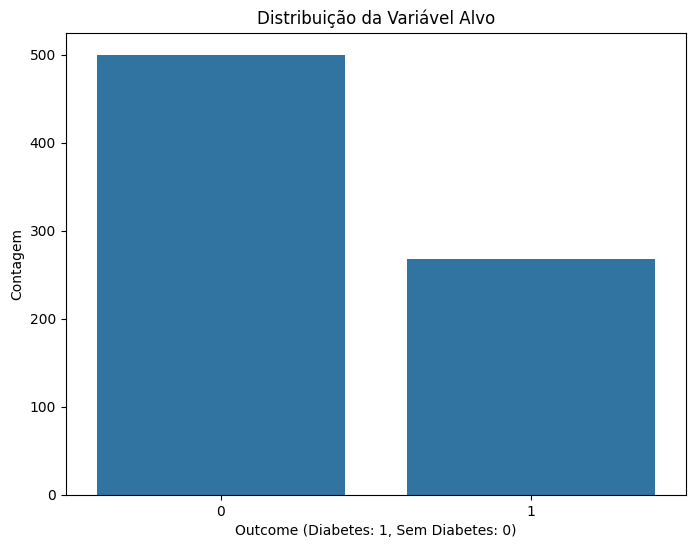

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=dados)
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Outcome (Diabetes: 1, Sem Diabetes: 0)')
plt.ylabel('Contagem')
plt.show()

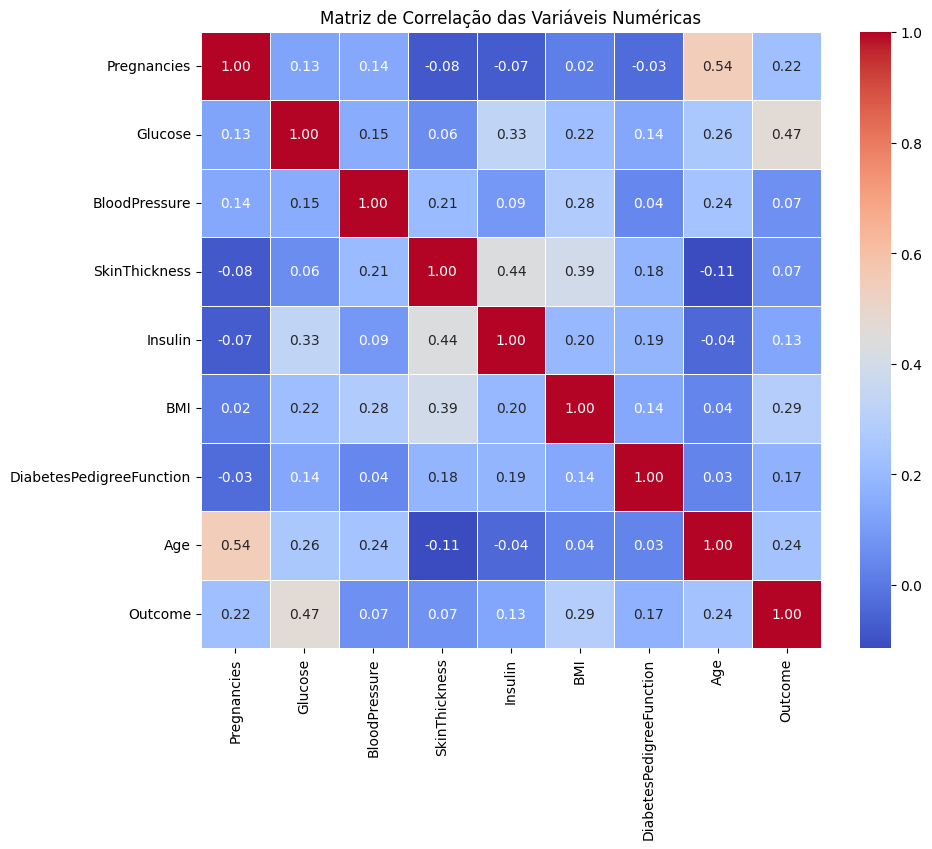

In [11]:
# Calcular a matriz de correlação
correlation_matrix = dados.corr()

# Plotar um mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

In [12]:
label_encoder = LabelEncoder()

In [13]:
# Aplicar o Label Encoding às variáveis categóricas
dados['Pregnancies'] = label_encoder.fit_transform(dados['Pregnancies'])
dados['Outcome'] = label_encoder.fit_transform(dados['Outcome'])

In [14]:
outcome_counts = dados['Outcome'].value_counts()

In [15]:
dados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


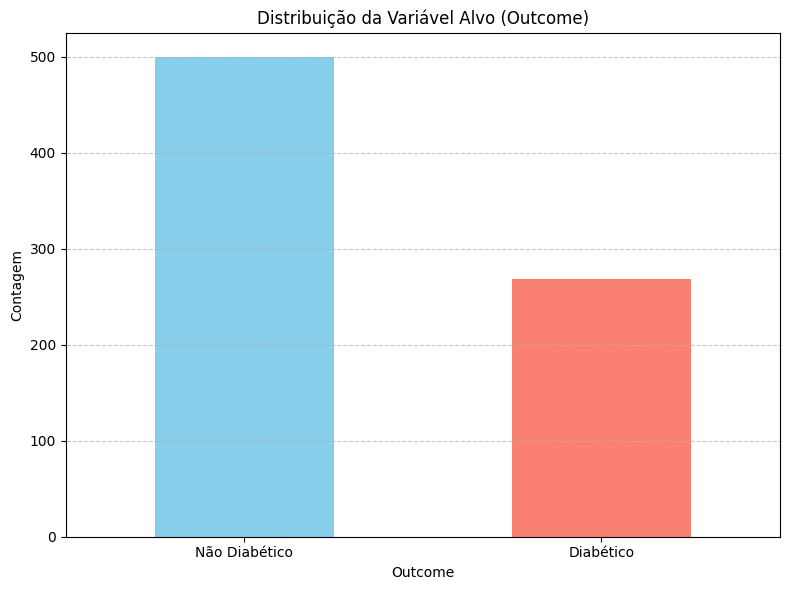

In [16]:
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição da Variável Alvo (Outcome)')
plt.xlabel('Outcome')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Não Diabético', 'Diabético'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
#Cria novas colunas com dados relacionando colunas umas com as outras
dados['Glucose_BMI'] = dados['Glucose'] * dados['BMI']
dados['Glucose_Age'] = dados['Glucose'] * dados['Age']
dados['BMI_Age'] = dados['BMI'] * dados['Age']


In [18]:
#cria a variavel pra normalizar os dados
scaler = MinMaxScaler()

In [19]:
#faz a normalização dos dados e já guarda no dataframe criado dados_norm
dados_norm = dados.copy()
dados_norm.iloc[:, :] = scaler.fit_transform(dados_norm.iloc[:, :])

In [20]:
#separa o data frame em 4 partes, X_treino e X_teste, y_treino e y_teste, 20% dos dados serão para teste
X = dados_norm.drop(columns = 'Outcome')
y = dados_norm['Outcome']
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=.2, random_state=42)

In [21]:
modelo = ExtraTreesClassifier()
modelo.fit(X_treino, y_treino)

ExtraTreesClassifier()

In [22]:
#verificando a acurácia e matriz de confusão do modelo
y_pred = modelo.predict(X_teste)

print(f'Acurácia do modelo de árvore: {round(accuracy_score(y_teste, y_pred)*100,2)}%')
confusion_matrix(y_teste, y_pred)

Acurácia do modelo de árvore: 75.32%


array([[80, 19],
       [19, 36]])

In [23]:
modeloRandomForest = RandomForestClassifier(random_state=42)
modeloRandomForest.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

In [24]:
#verificando a acurácia e matriz de confusão do modelo
y_pred = modeloRandomForest.predict(X_teste)

print(f'Acurácia do modelo Random Forest: {round(accuracy_score(y_teste, y_pred)*100,2)}%')
confusion_matrix(y_teste, y_pred)

Acurácia do modelo Random Forest: 76.62%


array([[79, 20],
       [16, 39]])

In [25]:
modeloRegressaoLogistica = LogisticRegression()
modeloRegressaoLogistica.fit(X_treino, y_treino)

LogisticRegression()

In [26]:
#verificando a acurácia e matriz de confusão do modelo
y_pred = modeloRegressaoLogistica.predict(X_teste)

print(f'Acurácia do modelo Regressão Logistíca: {round(accuracy_score(y_teste, y_pred)*100,2)}%')
confusion_matrix(y_teste, y_pred)

Acurácia do modelo Regressão Logistíca: 74.68%


array([[81, 18],
       [21, 34]])

In [27]:
modeloKNN = KNeighborsClassifier()
modeloKNN.fit(X_treino, y_treino)

KNeighborsClassifier()

In [28]:
#verificando a acurácia e matriz de confusão do modelo
y_pred = modeloKNN.predict(X_teste)

print(f'Acurácia do modelo KNN: {round(accuracy_score(y_teste, y_pred)*100,2)}%')
confusion_matrix(y_teste, y_pred)

Acurácia do modelo KNN: 71.43%


array([[79, 20],
       [24, 31]])

Verificar o ganho em caso de balanceamento de classes

In [29]:
#fazendo o SMOTE para balanceamento de classes e já transformando as variaveis
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_treino, y_treino)
X_smote.shape

(802, 11)

In [30]:
y_smote.value_counts()

Outcome
0    401
1    401
Name: count, dtype: int64

In [31]:
#treina o modelo com as variaveis balanceadas
modeloRandomcomSmote = RandomForestClassifier()
modeloRandomcomSmote.fit(X_smote, y_smote)

RandomForestClassifier()

In [32]:
#verificando a acurácia e matriz de confusão do modelo após balancear as classes
y_pred = modeloRandomcomSmote.predict(X_teste)

print(f'Acurácia do modelo Random Forest: {round(accuracy_score(y_teste, y_pred)*100,2)}%')
confusion_matrix(y_teste, y_pred)

Acurácia do modelo Random Forest: 72.73%


array([[70, 29],
       [13, 42]])

Foi identificado que não teria beneficio no balanceamento de classe

In [33]:
dados_norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_BMI,Glucose_Age,BMI_Age
0,0.3750,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1,0.465095,0.569318,0.622914
1,0.0625,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0,0.211467,0.202723,0.305747
2,0.5000,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1,0.398793,0.450531,0.276455
3,0.0625,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0,0.233904,0.143791,0.218799
4,0.0000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1,0.552254,0.347823,0.527364
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.6250,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0,0.310784,0.489537,0.768521
764,0.1250,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0,0.419903,0.253424,0.368409
765,0.3125,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0,0.296502,0.279274,0.291435
766,0.0625,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1,0.354714,0.455609,0.524546


In [34]:
#determinando as opções de hiperparametros a serem testadas
parametros = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [35]:
#guardando na variável a busca pelos melhores hiperaparametros de acordo com o modelo e os hiperparametro já passados na variável parametros
modeloExtra = GridSearchCV(ExtraTreesClassifier(),
                                parametros,
                               cv=5, n_jobs=-1, verbose=2)

In [36]:
#treinando o modelo e procurando os melhore hiperparametros
modeloExtra.fit(X_treino, y_treino)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [37]:
#guardando o melhor modelo em uma variável
melhorModelo = modeloExtra.best_estimator_

In [38]:
#verificando os melhores hiperparametros do modelo
print (melhorModelo)

ExtraTreesClassifier(min_samples_split=10, n_estimators=50)


In [39]:
#verificando a acuracia e matriz de confusão
y_pred = melhorModelo.predict(X_teste)

print(f'Acurácia do modelo Árvore de decisão: {round(accuracy_score(y_teste, y_pred)*100,2)}%')
confusion_matrix(y_teste, y_pred)

Acurácia do modelo Árvore de decisão: 74.68%


array([[79, 20],
       [19, 36]])

In [40]:
#treinando o modelo
modeloArvore = ExtraTreesClassifier(random_state=42)
modeloArvore.fit(X_treino, y_treino)

ExtraTreesClassifier(random_state=42)

In [41]:
#pegando o modelo treinado e criando um df pra guardar os atributos mais importantes
importancias = modeloArvore.feature_importances_
df_atributos = pd.DataFrame({'Atributo':X_treino.columns.tolist(), 'Importância': importancias})

In [42]:
#verificando a importância das variaveis
df_atributos.sort_values('Importância', ascending = False)

,Atributo,Importância
8,Glucose_BMI,0.153803
1,Glucose,0.134752
9,Glucose_Age,0.122898
10,BMI_Age,0.104805
7,Age,0.087262
5,BMI,0.076439
6,DiabetesPedigreeFunction,0.076214
2,BloodPressure,0.069500
0,Pregnancies,0.068239
4,Insulin,0.053553


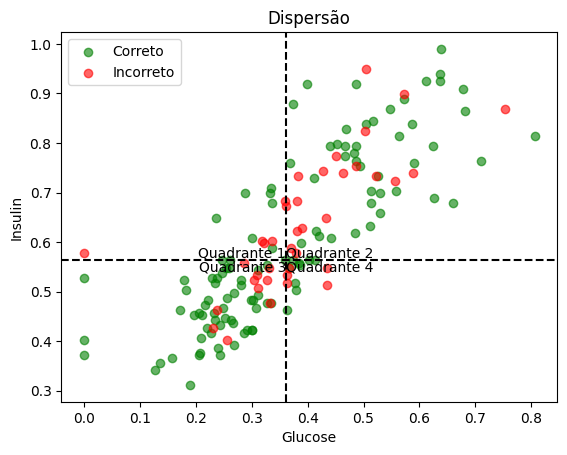

In [50]:
#Visualização de Scatter
correto = (y_teste == y_pred)
incorreto = (y_teste != y_pred)

x_median = X_teste.iloc[:, 8].median()
y_median = X_teste.iloc[:, 1].median()

plt.scatter(X_teste[correto].iloc[:, 8], X_teste[correto].iloc[:, 1], color='green', label='Correto', alpha=0.6)
plt.scatter(X_teste[incorreto].iloc[:, 8], X_teste[incorreto].iloc[:, 1], color='red', label='Incorreto', alpha=0.6)

plt.axvline(x=x_median, color='k', linestyle='--')  # Linha vertical na mediana de Glucose
plt.axhline(y=y_median, color='k', linestyle='--')  # Linha horizontal na mediana de Insulin

plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Dispersão')

# Adicionando legendas para os quadrantes
plt.text(x_median, y_median, 'Quadrante 1', verticalalignment='bottom', horizontalalignment='right')
plt.text(x_median, y_median, 'Quadrante 2', verticalalignment='bottom', horizontalalignment='left')
plt.text(x_median, y_median, 'Quadrante 3', verticalalignment='top', horizontalalignment='right')
plt.text(x_median, y_median, 'Quadrante 4', verticalalignment='top', horizontalalignment='left')

plt.legend()
plt.show()

In [44]:
X_teste

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_BMI,Glucose_Age,BMI_Age
668,0.3750,0.492462,0.475410,0.333333,0.224586,0.506706,0.150299,0.366667,0.311635,0.324204,0.542084
324,0.1250,0.562814,0.614754,0.323232,0.000000,0.532042,0.029889,0.000000,0.373962,0.180951,0.277976
624,0.1250,0.542714,0.524590,0.000000,0.000000,0.459016,0.034159,0.000000,0.311111,0.174488,0.239822
690,0.5000,0.537688,0.655738,0.000000,0.000000,0.366617,0.332195,0.216667,0.246184,0.279889,0.310122
473,0.4375,0.683417,0.737705,0.000000,0.000000,0.445604,0.056362,0.483333,0.380322,0.523157,0.554320
...,...,...,...,...,...,...,...,...,...,...,...
355,0.5625,0.829146,0.721311,0.000000,0.000000,0.453055,0.095645,0.466667,0.469136,0.622019,0.552317
534,0.0625,0.386935,0.459016,0.303030,0.066194,0.496274,0.500854,0.050000,0.239815,0.142176,0.296329
344,0.5000,0.477387,0.590164,0.000000,0.000000,0.548435,0.173783,0.600000,0.326973,0.416603,0.777753
296,0.1250,0.733668,0.573770,0.383838,0.425532,0.417288,0.110589,0.133333,0.382342,0.325742,0.301075


In [45]:
# Obter as probabilidades previstas
y_probs = melhorModelo.predict_proba(X_teste)[:, 1]

In [46]:
# Ordenar as probabilidades previstas em ordem crescente
sorted_probs_indices = np.argsort(y_probs)
sorted_probs = y_probs[sorted_probs_indices]

In [47]:
# Criar um array de índices para as amostras no conjunto de teste
indices = np.arange(len(sorted_probs))

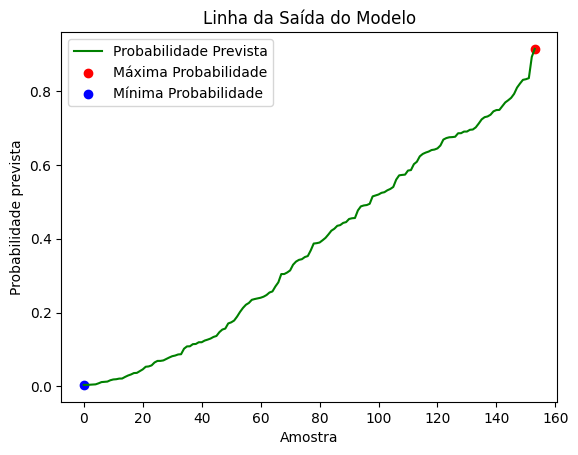

In [62]:
#Visualização de Regressão

plt.plot(indices, sorted_probs, color='green', label='Probabilidade Prevista')

# Adicionando destaque para valores máximos e mínimos
max_prob_index = np.argmax(sorted_probs)
min_prob_index = np.argmin(sorted_probs)
plt.scatter(indices[max_prob_index], sorted_probs[max_prob_index], color='red', label='Máxima Probabilidade')
plt.scatter(indices[min_prob_index], sorted_probs[min_prob_index], color='blue', label='Mínima Probabilidade')

# Adicionando linha de referência para limiar de decisão
plt.xlabel('Amostra')
plt.ylabel('Probabilidade prevista')
plt.title('Linha da Saída do Modelo')
plt.legend()
plt.show()

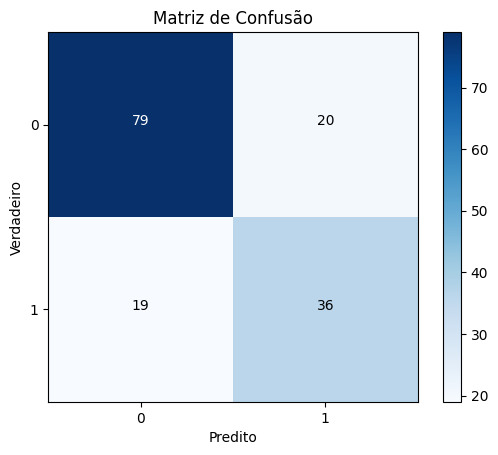

In [56]:
cm = confusion_matrix(y_teste, y_pred)

# Plotar a matriz de confusão
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
classes = np.unique(y_teste)
plt.xticks(classes, [str(i) for i in classes])
plt.yticks(classes, [str(i) for i in classes])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

# Adicionar os valores dentro dos quadrados
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.show()